In [103]:
import numpy as np
import pandas as pd

data = pd.read_csv('house_price.txt', names=['size', 'price'])
print data

X = data['size']
y = data['price']
m = len(data)

         size  price
0   27.575758   6.10
1   26.969697   3.80
2   36.969697   5.70
3   13.636364   1.80
4   56.969697  13.00
5   29.090909   6.20
6   80.303030  12.00
7   51.515152   9.00
8   34.848485   5.30
9   18.484848   1.70
10  30.909091   3.80
11  33.939394   5.80
12  26.060606   3.70
13  32.424242   8.50
14  32.121212   4.70
15  31.818182   4.70
16  30.909091   6.00
17  36.969697   5.00
18  32.424242   6.50
19  33.030303   6.50
20  27.575758   7.00
21  20.000000   2.70
22  25.454545   8.60
23  31.818182   6.20
24  32.424242   5.80
25  32.424242   8.19
26  28.484848   5.09
27  32.424242   8.00
28  37.272727   6.10
29  25.757576   5.90
30  23.333333   6.00
31  31.515152   7.20
32  33.333333   8.50
33  19.393939   3.90
34  33.030303   8.50
35  20.909091   2.50
36  33.636364   5.00
37  21.212121   2.35
38  30.606061   3.30
39  30.909091   4.50
40  29.393939   3.50
41  57.878788   6.30
42  30.909091   4.09
43  18.787879   2.20
44  28.181818   5.20
45  30.606061   3.30
46  21.212121

In [104]:
X = (np.array(X)).reshape(m,1)
y = (np.array(y)).reshape(m,1)
print X.shape, y.shape

(52, 1) (52, 1)


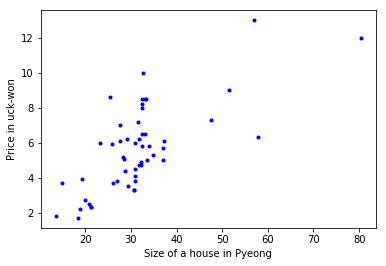

In [105]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')
plt.xlabel("Size of a house in Pyeong")
plt.ylabel("Price in uck-won")
plt.show()

In [106]:
X_b = np.c_[np.ones((m,1)), X]

learning_rate = 0.0001
n_iter = 200

theta = np.zeros((2,1))
gradients = np.zeros((2,1))

for i in range(n_iter):
    gradients = X_b.T.dot(X_b.dot(theta) - y) / m
    theta = theta - learning_rate * gradients
    
print "theta: "
print theta

theta: 
[[0.00642125]
 [0.17560879]]


In [107]:
X_new = np.array([[10],[90]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta)
print "10평과 90평 집의 예측 가격"
print y_predict

10평과 90평 집의 예측 가격
[[ 1.76250917]
 [15.81121253]]


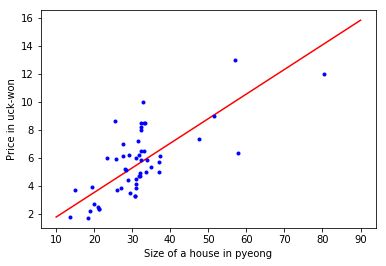

In [108]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.xlabel("Size of a house in pyeong")
plt.ylabel("Price in uck-won")
plt.show()

In [109]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=100, penalty=None, eta0=0.0001)
sgd_reg.fit(X, y.ravel())

/home/ec2-user/anaconda3/envs/pytorch_p27/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.0001, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=100, n_iter_no_change=5, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False)

theta:
[0.01111211] [0.17514883]


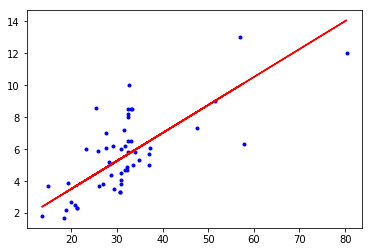

In [110]:
print "theta:"
print sgd_reg.intercept_, sgd_reg.coef_

y_pred = sgd_reg.predict(X)
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r')
plt.show()

In [111]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [112]:
def ComputeJ(t0, t1, X, y):
    m = len(X)
    X_b = np.c_[np.ones((m,1)),X]
    theta = np.array([t0, t1])
    
    cost_vector = X_b.dot(theta) - y
    
    cost_vector = cost_vector.reshape(-1)
    cost2 = np.square(cost_vector)
    cost_sum = np.sum(cost2)/(2*m)
    
    return cost_sum

In [113]:
d = 100

s = 1.0
theta0 = np.linspace(-15*s, 15*s, d)
theta1 = np.linspace(-1.0*s, 1.0*s, d)

J = np.ones((d,d))
for i,t0 in enumerate(theta0):
    for j,t1 in enumerate(theta1):
        cost = ComputeJ(t0,t1,X,y)
        J[i,j] = cost

In [ ]:
pX, pY = np.meshgrid(theta0, theta1)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(pX,pY,J,300,cmap='viridis')
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('J')
plt.show()